In [5]:
from sklearn.datasets import make_circles

# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

# # Setup device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using device: {device}")



x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")


The shapes of our data match !


In [9]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x



# Example usage:
model = Perceptron(2, 1)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)




num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3446
Epoch [200/4000], Loss: 0.2505
Epoch [300/4000], Loss: 0.1984
Epoch [400/4000], Loss: 0.1646
Epoch [500/4000], Loss: 0.1406
Epoch [600/4000], Loss: 0.1227
Epoch [700/4000], Loss: 0.1087
Epoch [800/4000], Loss: 0.0975
Epoch [900/4000], Loss: 0.0883
Epoch [1000/4000], Loss: 0.0807
Epoch [1100/4000], Loss: 0.0742
Epoch [1200/4000], Loss: 0.0687
Epoch [1300/4000], Loss: 0.0639
Epoch [1400/4000], Loss: 0.0597
Epoch [1500/4000], Loss: 0.0561
Epoch [1600/4000], Loss: 0.0528
Epoch [1700/4000], Loss: 0.0499
Epoch [1800/4000], Loss: 0.0473
Epoch [1900/4000], Loss: 0.0449
Epoch [2000/4000], Loss: 0.0428
Epoch [2100/4000], Loss: 0.0408
Epoch [2200/4000], Loss: 0.0390
Epoch [2300/4000], Loss: 0.0374
Epoch [2400/4000], Loss: 0.0359
Epoch [2500/4000], Loss: 0.0345
Epoch [2600/4000], Loss: 0.0332
Epoch [2700/4000], Loss: 0.0320
Epoch [2800/4000], Loss: 0.0309
Epoch [2900/4000], Loss: 0.0299
Epoch [3000/4000], Loss: 0.0289
Epoch [3100/4000], Loss: 0.0280
Epoch [3200/4000]

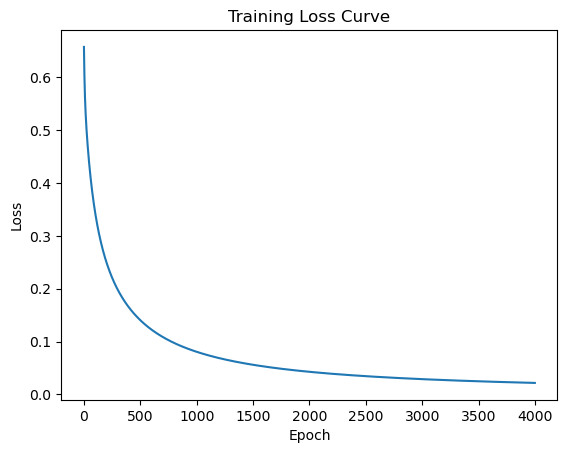

In [10]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()



plot_loss(loss_values)

In [11]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)



output = (test_output > 0.5).float()
print(output)

tensor([[2.4359e-05],
        [2.5168e-02],
        [2.5168e-02],
        [9.6474e-01]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [14]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)



# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc



from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values



# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)




print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Saving model to: models\01_pytorch_perceptron.pth
Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


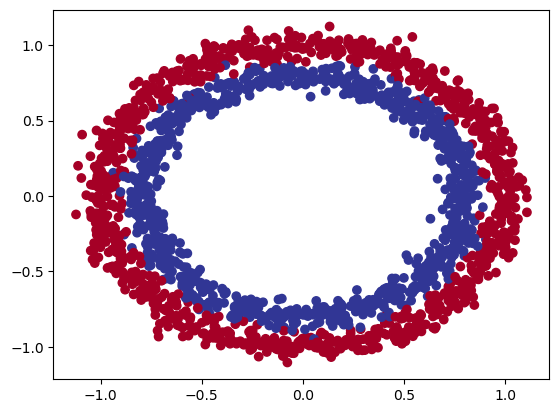

In [15]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [16]:
### HW 
# Ex 1

# Analyse the data: print the shape of our toy dataset

# What's the second dimension on X?

# Print some values of the toy dataset

print(X.shape)
print(y.shape)
print(X.shape[1])
print(X[:5])
print(y[:5])

torch.Size([2000, 2])
torch.Size([2000])
2
tensor([[ 0.4452, -0.5584],
        [-0.6263,  0.8151],
        [-0.4009,  0.7175],
        [ 0.8309, -0.6262],
        [-0.1443,  0.7514]])
tensor([1., 0., 1., 0., 1.])


In [19]:
#Ex 2 :

# In the next step, we need to prepare the data to be compatible with PyTorch and for modelling. To achieve this, we have two tasks to complete:

# Convert our data from NumPy arrays to PyTorch tensors as PyTorch works more efficiently with tensors. 
#Create a split between the training and testing sets. The model is trained on the training set to learn the relationships between X and y.
#Afterward, the model's learned patterns are evaluated on the test dataset.

from sklearn.model_selection import train_test_split
#Your code here

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

n_samples = 2000


X, y = make_circles(n_samples,
                    noise=0.05, 
                    random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42) 

In [20]:
#2 Baseline (Dumb) Model
#Ex 3 Build a model similar to the perceptron with 2 linear layers (no activation function) Please be mindfull of your
#model names (distinct names) If capable move your model to the gpu




import torch.nn as nn
import torch

class TwoLayerPerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(TwoLayerPerceptron, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)
        self.linear2 = nn.Linear(output_size, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.activation(x)
        return x

modelTwoLayer = TwoLayerPerceptron(2, 2)

y_train = torch.reshape(y_train, (1600, 1))
y_test = torch.reshape(y_test, (400, 1))

num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = modelTwoLayer(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.7216
Epoch [200/4000], Loss: 0.7216
Epoch [300/4000], Loss: 0.7216
Epoch [400/4000], Loss: 0.7216
Epoch [500/4000], Loss: 0.7216
Epoch [600/4000], Loss: 0.7216
Epoch [700/4000], Loss: 0.7216
Epoch [800/4000], Loss: 0.7216
Epoch [900/4000], Loss: 0.7216
Epoch [1000/4000], Loss: 0.7216
Epoch [1100/4000], Loss: 0.7216
Epoch [1200/4000], Loss: 0.7216
Epoch [1300/4000], Loss: 0.7216
Epoch [1400/4000], Loss: 0.7216
Epoch [1500/4000], Loss: 0.7216
Epoch [1600/4000], Loss: 0.7216
Epoch [1700/4000], Loss: 0.7216
Epoch [1800/4000], Loss: 0.7216
Epoch [1900/4000], Loss: 0.7216
Epoch [2000/4000], Loss: 0.7216
Epoch [2100/4000], Loss: 0.7216
Epoch [2200/4000], Loss: 0.7216
Epoch [2300/4000], Loss: 0.7216
Epoch [2400/4000], Loss: 0.7216
Epoch [2500/4000], Loss: 0.7216
Epoch [2600/4000], Loss: 0.7216
Epoch [2700/4000], Loss: 0.7216
Epoch [2800/4000], Loss: 0.7216
Epoch [2900/4000], Loss: 0.7216
Epoch [3000/4000], Loss: 0.7216
Epoch [3100/4000], Loss: 0.7216
Epoch [3200/4000]

In [21]:
#Equivalent of the circle model using nn sequential
# model_circle = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_circle

In [22]:
# Ex 4 Create the recommended loss_fn and optimizer
import torch.optim as optim
import torch.nn as nn

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.1)

test_output = modelTwoLayer(X_test)

output = (test_output > 0.5).float()
print(output)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [43]:
import matplotlib.pyplot as plt
import numpy as np


# Ex 5 Build the training loop
# Every 10 epochs rint the loss and the accuracy and save them in a loss_curve, acc_curve
# Also plot them
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = modelTwoLayer(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item()) 
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: -0.0000
Epoch [200/4000], Loss: -0.0000
Epoch [300/4000], Loss: -0.0000
Epoch [400/4000], Loss: -0.0000
Epoch [500/4000], Loss: -0.0000
Epoch [600/4000], Loss: -0.0000
Epoch [700/4000], Loss: -0.0000
Epoch [800/4000], Loss: -0.0000
Epoch [900/4000], Loss: -0.0000
Epoch [1000/4000], Loss: -0.0000
Epoch [1100/4000], Loss: -0.0000
Epoch [1200/4000], Loss: -0.0000
Epoch [1300/4000], Loss: -0.0000
Epoch [1400/4000], Loss: -0.0000
Epoch [1500/4000], Loss: -0.0000
Epoch [1600/4000], Loss: -0.0000
Epoch [1700/4000], Loss: -0.0000
Epoch [1800/4000], Loss: -0.0000
Epoch [1900/4000], Loss: -0.0000
Epoch [2000/4000], Loss: -0.0000
Epoch [2100/4000], Loss: -0.0000
Epoch [2200/4000], Loss: -0.0000
Epoch [2300/4000], Loss: -0.0000
Epoch [2400/4000], Loss: -0.0000
Epoch [2500/4000], Loss: -0.0000
Epoch [2600/4000], Loss: -0.0000
Epoch [2700/4000], Loss: -0.0000
Epoch [2800/4000], Loss: -0.0000
Epoch [2900/4000], Loss: -0.0000
Epoch [3000/4000], Loss: -0.0000
Epoch [3100/4000], 

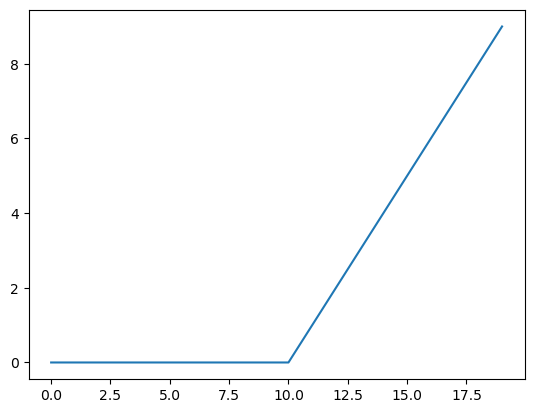

In [27]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy


def relu(x):
  return torch.maximum(torch.tensor(0), x) 

relu(input_dummy)


plt.plot(relu(input_dummy))

In [28]:
# Ex 6 Recreate the model with some none linear activation functions
# Use the ReLU activation function

model_relu = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid()
).to(device)

In [29]:
# Ex 7 Recreate the optimizer and training loop
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_relu.parameters(), lr=0.1)

loss_curve = []
acc_curve = []
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model_relu(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    loss_curve.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.6352
Epoch [20/1000], Loss: 0.4867
Epoch [30/1000], Loss: 0.2684
Epoch [40/1000], Loss: 0.1385
Epoch [50/1000], Loss: 0.0911
Epoch [60/1000], Loss: 0.0724
Epoch [70/1000], Loss: 0.0639
Epoch [80/1000], Loss: 0.0588
Epoch [90/1000], Loss: 0.0553
Epoch [100/1000], Loss: 0.0529
Epoch [110/1000], Loss: 0.0511
Epoch [120/1000], Loss: 0.0499
Epoch [130/1000], Loss: 0.0487
Epoch [140/1000], Loss: 0.0481
Epoch [150/1000], Loss: 0.0470
Epoch [160/1000], Loss: 0.0465
Epoch [170/1000], Loss: 0.0458
Epoch [180/1000], Loss: 0.0453
Epoch [190/1000], Loss: 0.0449
Epoch [200/1000], Loss: 0.0445
Epoch [210/1000], Loss: 0.0443
Epoch [220/1000], Loss: 0.0443
Epoch [230/1000], Loss: 0.0439
Epoch [240/1000], Loss: 0.0437
Epoch [250/1000], Loss: 0.0436
Epoch [260/1000], Loss: 0.0435
Epoch [270/1000], Loss: 0.0435
Epoch [280/1000], Loss: 0.0432
Epoch [290/1000], Loss: 0.0431
Epoch [300/1000], Loss: 0.0430
Epoch [310/1000], Loss: 0.0429
Epoch [320/1000], Loss: 0.0429
Epoch [330/1000],

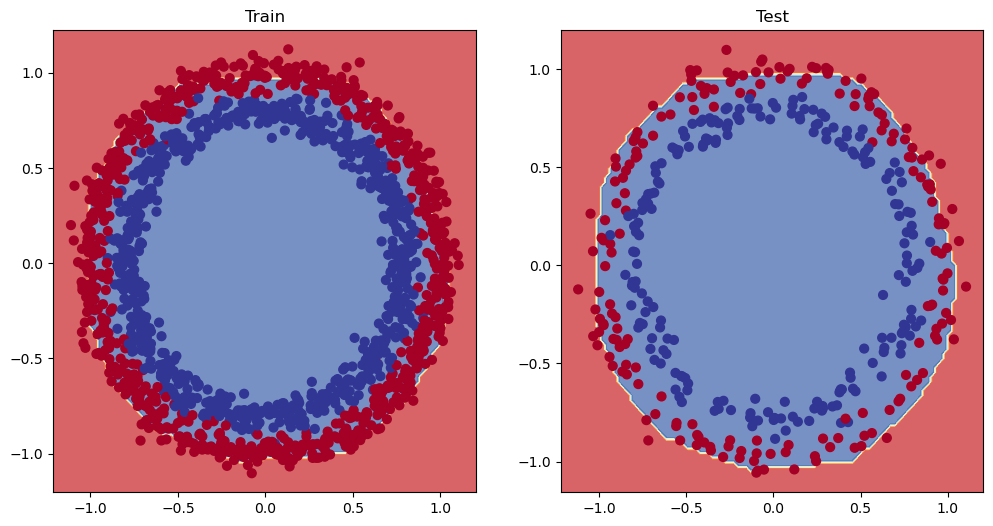

In [49]:
#!!!!!


import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor) -> None:
    device = torch.device("cpu")
    model.to(device)
    X, y = X.to(device), y.to(device)


    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float().to(device)

    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # multi-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())





# Ex 8 Evaluate visual
#Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_relu, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_relu, X_test, y_test)




tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


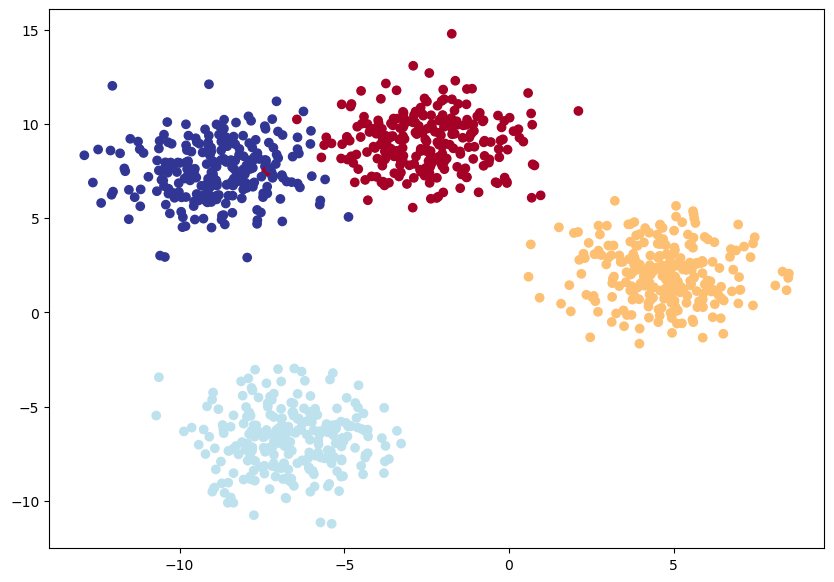

In [31]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [32]:
# Ex 9 (For grade 10): Create a pytorch flow to do multi class classification as instructed in the previos examples

# Tip since the data presents itself as a having liniar relationships no relu/sigmoid activation are required.
class TwoLayerPerceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TwoLayerPerceptron, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, 10)
        self.layer2 = torch.nn.Linear(10, 10)
        self.layer3 = torch.nn.Linear(10, output_dim)
        self.activation1 = torch.nn.Tanh()
        self.activation2 = torch.nn.Tanh()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        return x
    
model_circle = TwoLayerPerceptron(2, 4)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.1)

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, 
    centers=NUM_CLASSES, 
    cluster_std=1.5,
    random_state=RANDOM_SEED
)


X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

num_epochs = 10000
loss_values = []
acc_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model_circle(X_blob_train)
    loss = criterion(y_pred, y_blob_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        loss_values.append(loss.item()) 
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.0250
Epoch [2000/10000], Loss: 0.0229
Epoch [3000/10000], Loss: 0.0213
Epoch [4000/10000], Loss: 0.0199
Epoch [5000/10000], Loss: 0.0187
Epoch [6000/10000], Loss: 0.0180
Epoch [7000/10000], Loss: 0.0175
Epoch [8000/10000], Loss: 0.0173
Epoch [9000/10000], Loss: 0.0172
Epoch [10000/10000], Loss: 0.0172


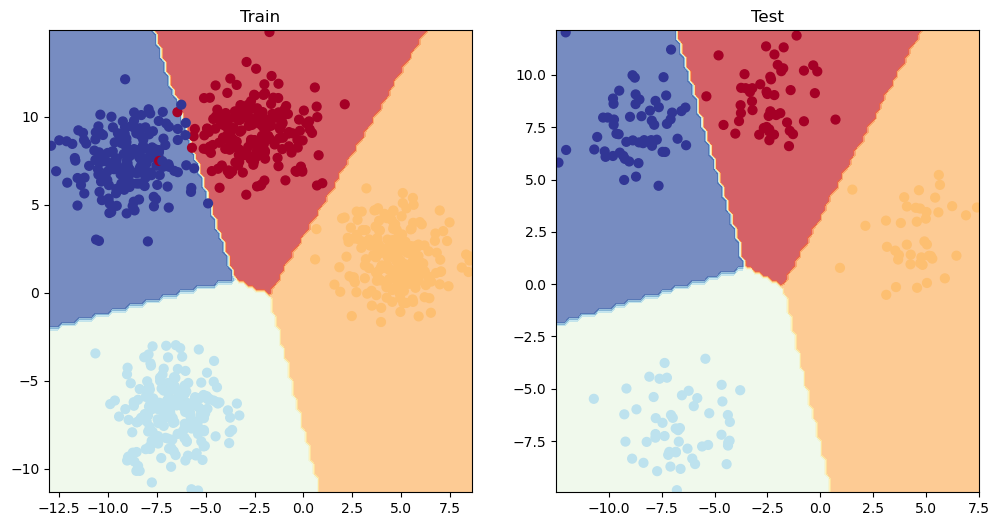

In [50]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor) -> None:
    """Plots decision boundaries of a given PyTorch model, in comparison to the ground truth.

    Args:
        model (torch.nn.Module): The PyTorch model to visualize.
        X (torch.Tensor): The input tensor for the model.
        y (torch.Tensor): The ground truth tensor.

    Returns:
        None.

    """
    # Transfer the model and data to CPU
    device = torch.device("cpu")
    model.to(device)
    X, y = X.to(device), y.to(device)

    # Create a grid of prediction boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Convert the grid to a PyTorch tensor
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float().to(device)

    # Make predictions using the model
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    # Determine if this is a binary or multi-class classification problem
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # multi-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape the prediction tensor and plot the decision boundary
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_blob_test, y_blob_test)